In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [2]:
df = pd.read_csv(r'D:\Tesis\bases_datos\real_estate_clean_ultimo.csv')

In [3]:
df.isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

In [27]:
#df_resumido = df[["currency_id","date_created","price","attribute_condición_del_ítem","attribute_baños","attribute_ambientes","attribute_property_type","attribute_dormitorios","attribute_property_type","location_city_name","attribute_superficie_total","description","attribute_operation"]]

In [6]:
import pandas as pd

# Suponiendo que ya tienes un DataFrame llamado df

# Variables numéricas
variables_numericas = df.select_dtypes(include=['number']).columns

# Variables categóricas
variables_categoricas = df.select_dtypes(include=['object', 'category']).columns

print("Variables numéricas:", variables_numericas)
print("Variables categóricas:", variables_categoricas)


Variables numéricas: Index(['Unnamed: 0', 'attribute_ambientes', 'attribute_baños',
       'attribute_cantidad_de_pisos', 'attribute_cocheras', 'health',
       'official_store_id', 'price', 'seller_address_id', 'seller_id',
       'price.1', 'superficie_total', 'dias_desde_fecha'],
      dtype='object')
Variables categóricas: Index(['attribute_acceso', 'attribute_acceso_a_internet',
       'attribute_admite_mascotas', 'attribute_agua_corriente',
       'attribute_aire_acondicionado', 'attribute_alarma',
       'attribute_apto_crédito', 'attribute_apto_profesional',
       'attribute_ascensor', 'attribute_balcón', 'attribute_calefacción',
       'attribute_cloaca', 'attribute_cocina', 'attribute_comedor',
       'attribute_con_conexión_para_lavarropas', 'attribute_con_lavadero',
       'attribute_condición_del_ítem', 'attribute_disposición',
       'attribute_dormitorio_en_suite', 'attribute_gas_natural',
       'attribute_gimnasio', 'attribute_jardín', 'attribute_lavandería',
       '

In [5]:
def analizar_columnas_numericas(df, columnas_numericas):
    """
    Calcula estadísticas descriptivas para columnas numéricas y genera histogramas.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - columnas_numericas: Lista de nombres de columnas numéricas.

    Retorna:
    - stats_numericas: DataFrame con estadísticas descriptivas.
    """
    # Calcular estadísticas descriptivas
    stats_numericas = df[columnas_numericas].describe().transpose()
    print("Estadísticas Descriptivas de Columnas Numéricas:")
    print(stats_numericas)

    # Generar histogramas para cada columna numérica
    for col in columnas_numericas:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        
        plt.ylabel('Frecuencia')
        plt.show()

    return stats_numericas


stats_numericas = analizar_columnas_numericas(df, columnas_numericas)


KeyError: "['attribute_bauleras', 'attribute_departamentos_por_piso', 'attribute_dormitorios', 'attribute_estrato_social', 'attribute_número_de_piso_de_la_unidad', 'attribute_valor_del_condominio', 'attribute_valor_del_iptu', 'base_price', 'initial_quantity'] not in index"

In [4]:
def analizar_columnas_categoricas(df, columnas_categoricas):
    """
    Calcula frecuencias de categorías y genera gráficas de barras.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - columnas_categoricas: Lista de nombres de columnas categóricas.

    Retorna:
    - frecuencias_categoricas: Diccionario con frecuencias por columna.
    """
    frecuencias_categoricas = {}

    for col in columnas_categoricas:
        # Calcular frecuencias
        frecuencias = df[col].value_counts(dropna=False)
        frecuencias_categoricas[col] = frecuencias
        print(f"\nFrecuencias de la columna '{col}':")
        print(frecuencias)

        # Generar gráfica de barras
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, y=col, order=frecuencias.index)
        plt.title(f'Conteo de categorías en {col}')
        plt.xlabel('Frecuencia')
        plt.ylabel(col)
        plt.show()

    return frecuencias_categoricas

# Uso de la función
columnas_categoricas = ['attribute_antigüedad', 'attribute_condición_del_ítem', 'attribute_disposición', 
                        'attribute_expensas', 'attribute_horario_de_contacto', 'attribute_orientación', 
                        'attribute_property_type', 'attribute_superficie_cubierta', 'attribute_superficie_de_balcón', 
                        'attribute_superficie_total', 'category_id', 'condition', 'date_created', 'description', 
                        'domain_id', 'id', 'last_updated', 'listing_type_id', 'location_address_line', 
                        'location_city_id', 'location_city_name', 'location_neighborhood_id', 'location_neighborhood_name', 
                        'location_state_id', 'location_state_name', 'permalink', 'pictures_urls', 'seller_address_city_id', 
                        'seller_address_city_name', 'seller_address_search_location_city_id', 'seller_address_search_location_city_name', 
                        'seller_address_search_location_neighborhood_id', 'seller_address_search_location_neighborhood_name', 
                        'seller_address_search_location_state_id', 'seller_address_search_location_state_name', 
                        'seller_address_state_id', 'seller_address_state_name', 'tags', 'thumbnail', 'thumbnail_id', 
                        'title', 'video_id']

frecuencias_categoricas = analizar_columnas_categoricas(df, columnas_categoricas)


KeyError: 'attribute_antigüedad'


Distribución de la columna 'attribute_acceso_a_internet':
NaN    83476
No     66273
Sí     42671
Name: attribute_acceso_a_internet, dtype: int64


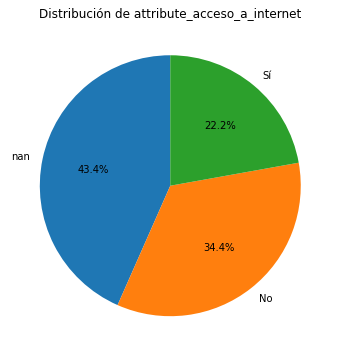


Distribución de la columna 'attribute_admite_mascotas':
NaN    137196
No      36881
Sí      18343
Name: attribute_admite_mascotas, dtype: int64


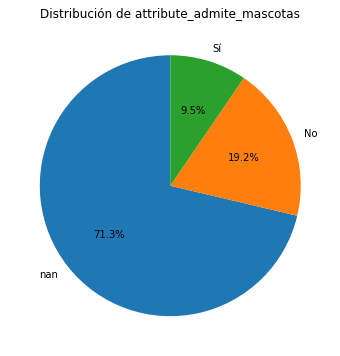


Distribución de la columna 'attribute_agua_corriente':
Sí     85536
NaN    66799
No     40085
Name: attribute_agua_corriente, dtype: int64


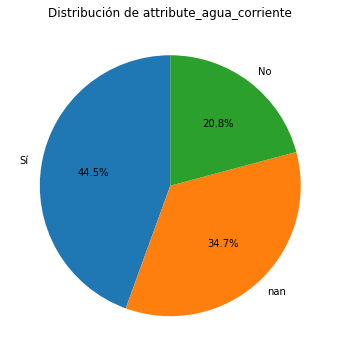


Distribución de la columna 'attribute_aire_acondicionado':
NaN    90640
No     68766
Sí     33014
Name: attribute_aire_acondicionado, dtype: int64


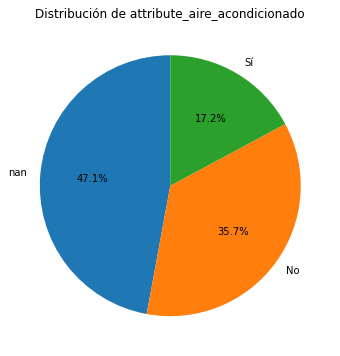


Distribución de la columna 'attribute_apto_crédito':
NaN    91188
No     74904
Sí     26328
Name: attribute_apto_crédito, dtype: int64


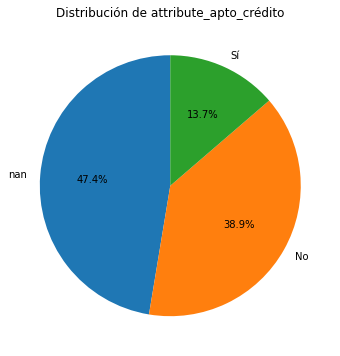


Distribución de la columna 'attribute_apto_profesional':
NaN    104886
No      69269
Sí      18265
Name: attribute_apto_profesional, dtype: int64


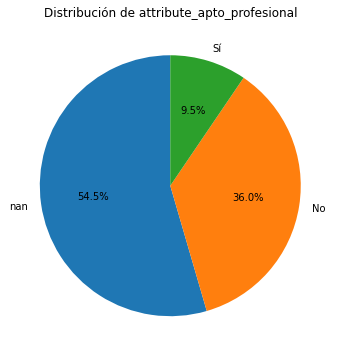


Distribución de la columna 'attribute_ascensor':
NaN    101870
No      67560
Sí      22990
Name: attribute_ascensor, dtype: int64


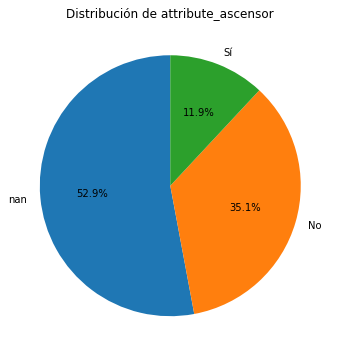


Distribución de la columna 'attribute_balcón':
NaN    91528
No     55859
Sí     45033
Name: attribute_balcón, dtype: int64


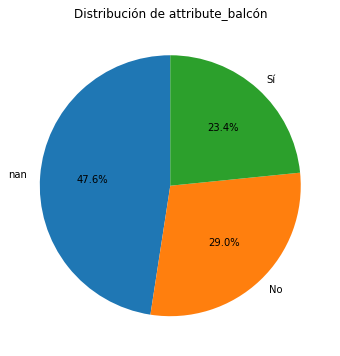


Distribución de la columna 'attribute_calefacción':
NaN    80785
No     79143
Sí     32492
Name: attribute_calefacción, dtype: int64


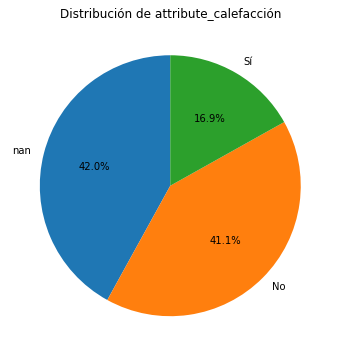


Distribución de la columna 'attribute_cocina':
NaN    81716
Sí     67606
No     43098
Name: attribute_cocina, dtype: int64


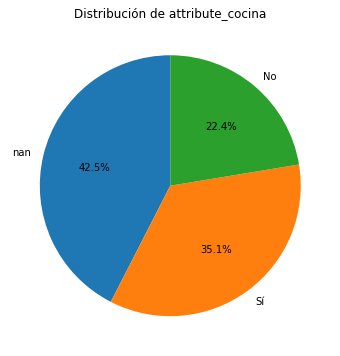


Distribución de la columna 'attribute_comedor':
NaN    94084
No     62912
Sí     35424
Name: attribute_comedor, dtype: int64


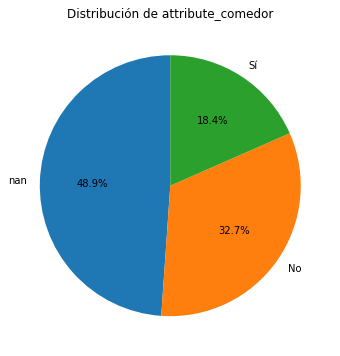


Distribución de la columna 'attribute_con_conexión_para_lavarropas':
NaN    115399
No      49512
Sí      27509
Name: attribute_con_conexión_para_lavarropas, dtype: int64


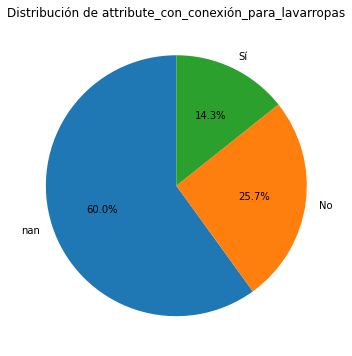


Distribución de la columna 'attribute_con_lavadero':
NaN    95288
No     53806
Sí     43326
Name: attribute_con_lavadero, dtype: int64


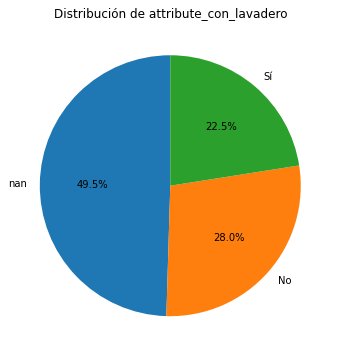


Distribución de la columna 'attribute_código_de_la_propiedad':
NaN    192420
Name: attribute_código_de_la_propiedad, dtype: int64


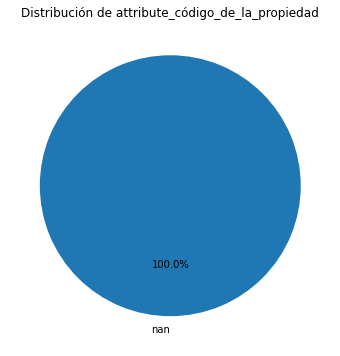


Distribución de la columna 'attribute_dormitorio_en_suite':
NaN    110592
No      60633
Sí      21195
Name: attribute_dormitorio_en_suite, dtype: int64


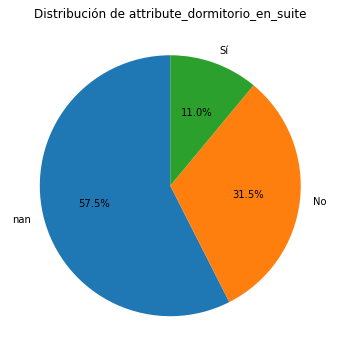


Distribución de la columna 'attribute_gas_natural':
Sí     73299
No     62056
NaN    57065
Name: attribute_gas_natural, dtype: int64


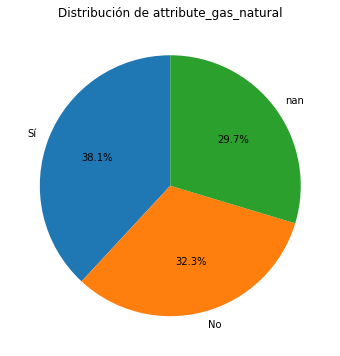


Distribución de la columna 'attribute_gimnasio':
NaN    91863
No     86340
Sí     14217
Name: attribute_gimnasio, dtype: int64


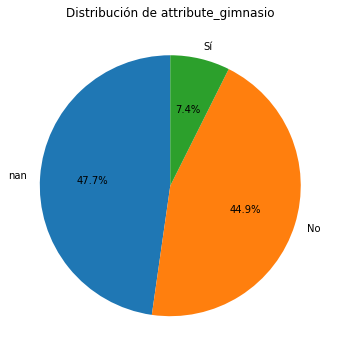


Distribución de la columna 'attribute_jardín':
NaN    91453
No     73084
Sí     27883
Name: attribute_jardín, dtype: int64


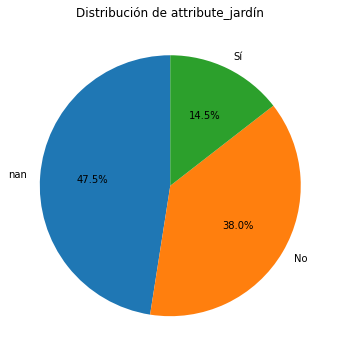


Distribución de la columna 'attribute_lavandería':
NaN    139540
No      40165
Sí      12715
Name: attribute_lavandería, dtype: int64


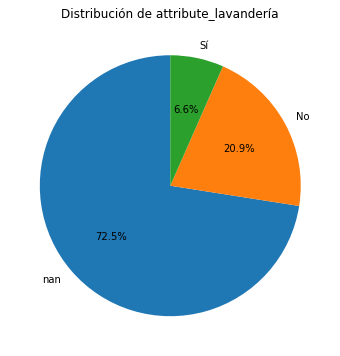


Distribución de la columna 'attribute_living':
NaN    97403
No     63159
Sí     31858
Name: attribute_living, dtype: int64


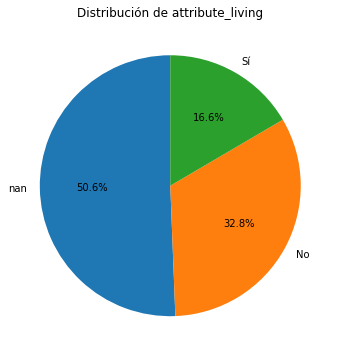


Distribución de la columna 'attribute_línea_telefónica':
NaN    86451
No     78622
Sí     27347
Name: attribute_línea_telefónica, dtype: int64


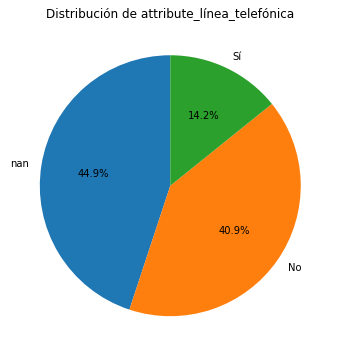


Distribución de la columna 'attribute_parrilla':
NaN    77956
No     67785
Sí     46679
Name: attribute_parrilla, dtype: int64


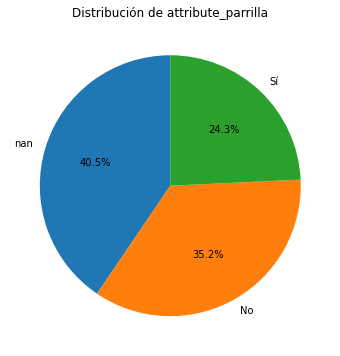


Distribución de la columna 'attribute_patio':
NaN    92466
No     76242
Sí     23712
Name: attribute_patio, dtype: int64


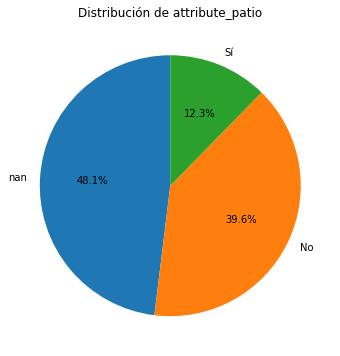


Distribución de la columna 'attribute_pileta':
NaN    88933
No     70601
Sí     32886
Name: attribute_pileta, dtype: int64


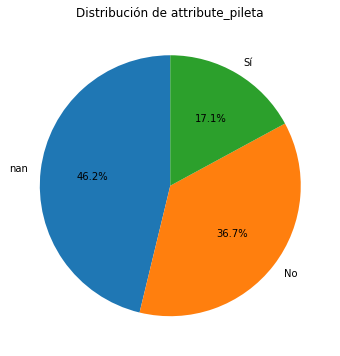


Distribución de la columna 'attribute_placards':
NaN    105679
No      77920
Sí       8821
Name: attribute_placards, dtype: int64


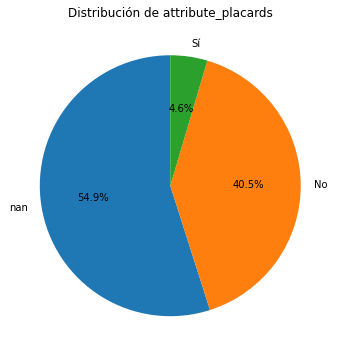


Distribución de la columna 'attribute_salón_de_usos_múltiples':
NaN    127020
No      47158
Sí      18242
Name: attribute_salón_de_usos_múltiples, dtype: int64


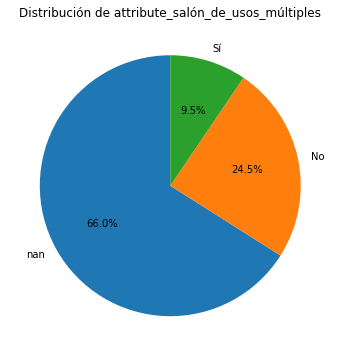


Distribución de la columna 'attribute_seguridad':
No     111821
NaN     56284
Sí      24315
Name: attribute_seguridad, dtype: int64


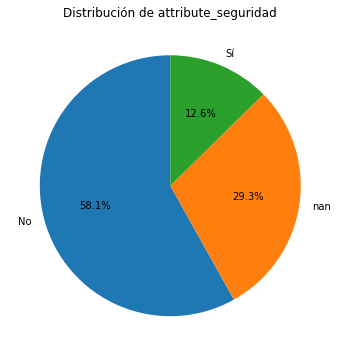


Distribución de la columna 'attribute_terraza':
NaN    89926
No     82224
Sí     20270
Name: attribute_terraza, dtype: int64


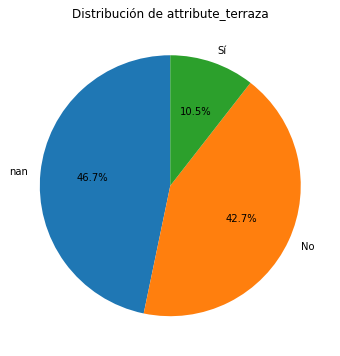


Distribución de la columna 'attribute_toilette':
NaN    89875
No     68208
Sí     34337
Name: attribute_toilette, dtype: int64


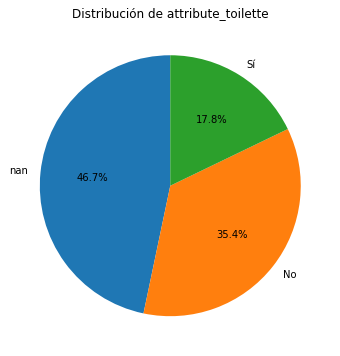


Distribución de la columna 'attribute_vestidor':
NaN    103239
No      72755
Sí      16426
Name: attribute_vestidor, dtype: int64


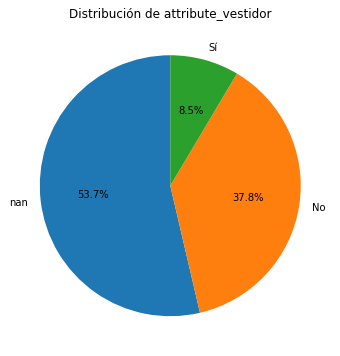

In [10]:
def analizar_columnas_binarias(df, columnas_binarias):
    """
    Calcula la distribución de valores en columnas binarias y genera gráficas circulares.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - columnas_binarias: Lista de nombres de columnas binarias.

    Retorna:
    - distribucion_binarias: Diccionario con distribuciones por columna.
    """
    distribucion_binarias = {}

    for col in columnas_binarias:
        # Calcular distribución de valores
        distribucion = df[col].value_counts(dropna=False)
        distribucion_binarias[col] = distribucion
        print(f"\nDistribución de la columna '{col}':")
        print(distribucion)

        # Generar gráfica circular
        plt.figure(figsize=(6, 6))
        distribucion.plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribución de {col}')
        plt.ylabel('')
        plt.show()

    return distribucion_binarias

# Uso de la función
columnas_binarias = ['attribute_acceso_a_internet', 'attribute_admite_mascotas', 'attribute_agua_corriente', 
                     'attribute_aire_acondicionado', 'attribute_apto_crédito', 'attribute_apto_profesional', 
                     'attribute_ascensor', 'attribute_balcón', 'attribute_calefacción', 'attribute_cocina', 
                     'attribute_comedor', 'attribute_con_conexión_para_lavarropas', 'attribute_con_lavadero', 
                     'attribute_código_de_la_propiedad', 'attribute_dormitorio_en_suite', 'attribute_gas_natural', 
                     'attribute_gimnasio', 'attribute_jardín', 'attribute_lavandería', 'attribute_living', 
                     'attribute_línea_telefónica', 'attribute_parrilla', 'attribute_patio', 'attribute_pileta', 
                     'attribute_placards', 'attribute_salón_de_usos_múltiples', 'attribute_seguridad', 'attribute_terraza', 
                     'attribute_toilette', 'attribute_vestidor']

distribucion_binarias = analizar_columnas_binarias(df, columnas_binarias)


Matriz de Correlación:
                                       attribute_ambientes  \
attribute_ambientes                               1.000000   
attribute_bauleras                                     NaN   
attribute_baños                                   0.644923   
attribute_cantidad_de_pisos                      -0.094955   
attribute_cocheras                                0.419704   
attribute_departamentos_por_piso                 -0.039711   
attribute_dormitorios                             0.895434   
attribute_estrato_social                               NaN   
attribute_número_de_piso_de_la_unidad            -0.027867   
attribute_valor_del_condominio                         NaN   
attribute_valor_del_iptu                               NaN   
base_price                                        0.010464   
health                                            0.140048   
initial_quantity                                       NaN   
official_store_id                              

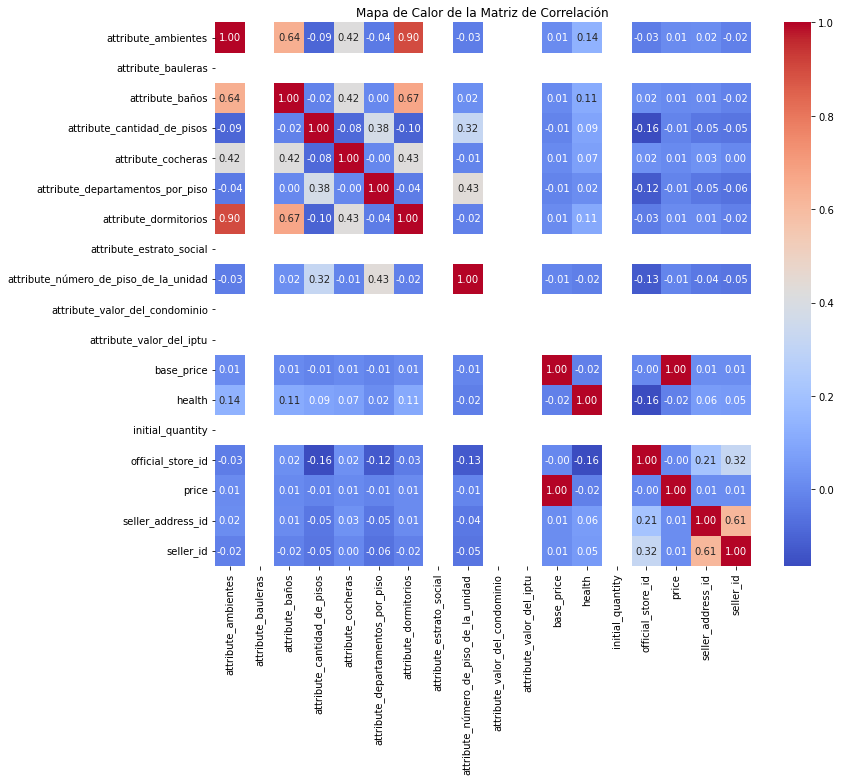

In [11]:
def matriz_correlacion(df, columnas_numericas):
    """
    Calcula y muestra la matriz de correlación entre columnas numéricas.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - columnas_numericas: Lista de nombres de columnas numéricas.

    Retorna:
    - corr_matrix: DataFrame de la matriz de correlación.
    """
    # Calcular matriz de correlación
    corr_matrix = df[columnas_numericas].corr()
    print("Matriz de Correlación:")
    print(corr_matrix)

    # Generar mapa de calor
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Mapa de Calor de la Matriz de Correlación')
    plt.show()

    return corr_matrix

# Uso de la función
corr_matrix = matriz_correlacion(df, columnas_numericas)


Porcentaje de valores nulos por columna:
                                  Porcentaje de Valores Nulos
accepts_mercadopago                                100.000000
attribute_código_de_la_propiedad                   100.000000
shipping_store_pick_up                             100.000000
shipping_local_pick_up                             100.000000
shipping_free_shipping                             100.000000
...                                                       ...
category_id                                          0.080033
location_state_name                                  0.046773
location_state_id                                    0.046773
seller_address_city_name                             0.044694
attribute_property_type                              0.027544

[85 rows x 1 columns]


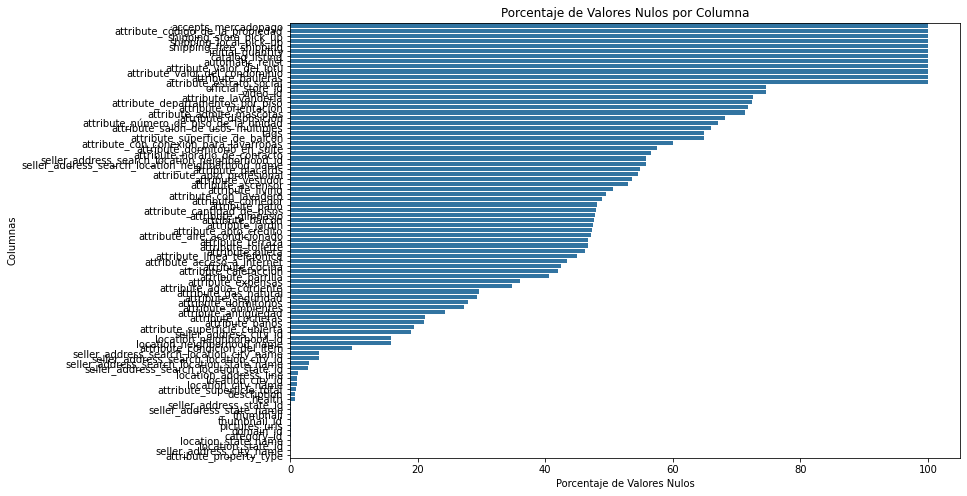

In [12]:
def analizar_valores_nulos(df):
    """
    Calcula y muestra el porcentaje de valores nulos por columna.

    Parámetro:
    - df: DataFrame a analizar.

    Retorna:
    - nulos_df: DataFrame con el porcentaje de valores nulos por columna.
    """
    # Calcular el porcentaje de valores nulos por columna
    missing_values_percent = (df.isnull().sum() / len(df)).mul(100)
    nulos_df = pd.DataFrame(missing_values_percent, columns=['Porcentaje de Valores Nulos'])
    nulos_df = nulos_df[nulos_df['Porcentaje de Valores Nulos'] > 0].sort_values(by='Porcentaje de Valores Nulos', ascending=False)
    
    print("Porcentaje de valores nulos por columna:")
    print(nulos_df)

    # Visualización
    plt.figure(figsize=(12, 8))
    sns.barplot(x=nulos_df['Porcentaje de Valores Nulos'], y=nulos_df.index)
    plt.title('Porcentaje de Valores Nulos por Columna')
    plt.xlabel('Porcentaje de Valores Nulos')
    plt.ylabel('Columnas')
    plt.show()

    return nulos_df

# Uso de la función
nulos_df = analizar_valores_nulos(df)


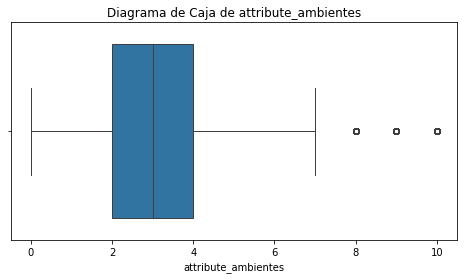

Outliers detectados en 'attribute_ambientes': 1007


ValueError: List of boxplot statistics and `positions` values must have same the length

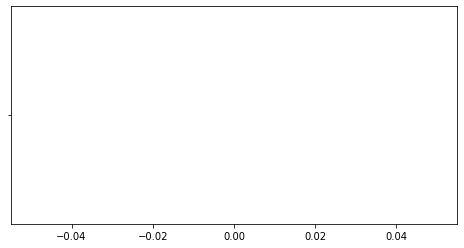

In [13]:
def detectar_outliers(df, columnas_numericas):
    """
    Detecta y visualiza outliers en columnas numéricas usando diagramas de caja.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - columnas_numericas: Lista de nombres de columnas numéricas.

    Retorna:
    - outliers_info: Diccionario con información de outliers por columna.
    """
    outliers_info = {}

    for col in columnas_numericas:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Diagrama de Caja de {col}')
        plt.xlabel(col)
        plt.show()

        # Calcular cuartiles y límites para detectar outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)][col]
        outliers_info[col] = outliers

        print(f"Outliers detectados en '{col}': {len(outliers)}")

    return outliers_info

# Uso de la función
outliers_info = detectar_outliers(df, columnas_numericas)


Tabla de contingencia entre 'attribute_property_type' y 'attribute_condición_del_ítem':
attribute_condición_del_ítem  Nuevo  Usado     All
attribute_property_type                           
Cama náutica                     15     32      47
Campo                           460    319     779
Casa                          11364  28410   39774
Cochera                        1942   2480    4422
Departamento                  35919  40614   76533
Depósito y galpón               564   1228    1792
Fondo de comercio                99    512     611
Local                          1576   3091    4667
Oficina                        1248   2065    3313
Otro inmueble                   281    532     813
Parcela, nicho y bóveda           2    121     123
Ph                             1742   7886    9628
Quinta                          212   1087    1299
Terreno y lote                20276   9785   30061
All                           75700  98162  173862


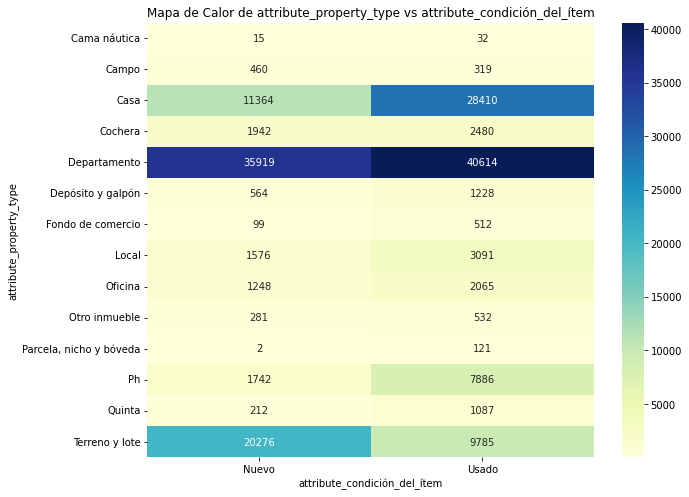

In [14]:
def tablas_contingencia(df, columna1, columna2):
    """
    Genera una tabla de contingencia entre dos variables categóricas y visualiza con un mapa de calor.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - columna1: Nombre de la primera columna categórica.
    - columna2: Nombre de la segunda columna categórica.

    Retorna:
    - tabla_contingencia: DataFrame de la tabla de contingencia.
    """
    # Crear tabla de contingencia
    tabla_contingencia = pd.crosstab(df[columna1], df[columna2], margins=True)
    print(f"Tabla de contingencia entre '{columna1}' y '{columna2}':")
    print(tabla_contingencia)

    # Visualización con mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(pd.crosstab(df[columna1], df[columna2]), annot=True, fmt="d", cmap='YlGnBu')
    plt.title(f'Mapa de Calor de {columna1} vs {columna2}')
    plt.show()

    return tabla_contingencia

# Uso de la función
# Ejemplo: Análisis entre 'attribute_property_type' y 'attribute_condición_del_ítem'
tabla_contingencia = tablas_contingencia(df, 'attribute_property_type', 'attribute_condición_del_ítem')


Precio medio y mediano por tipo de propiedad:
    attribute_property_type  Precio Medio  Precio Mediano  Cantidad
0              Cama náutica  1.181555e+05         45000.0       112
1                     Campo  3.487374e+05        150000.0       946
2                      Casa  4.407898e+05        215000.0     44033
3                   Cochera  2.225437e+04         15500.0      5152
4              Departamento  3.347847e+05        116182.0     81340
5         Depósito y galpón  3.295240e+05        235000.0      1971
6         Fondo de comercio  1.071273e+06         22000.0       949
7                     Local  2.248451e+05        140000.0      5237
8                   Oficina  1.750303e+05        130000.0      3627
9             Otro inmueble  6.038322e+05        192000.0      1013
10  Parcela, nicho y bóveda  3.461858e+05          2500.0       232
11                       Ph  1.233443e+05         99900.0     10542
12                   Quinta  2.555577e+05        220000.0      1443
13

C:\Users\lucki\AppData\Local\Temp\ipykernel_19408\3667956181.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resumen_precio, x='attribute_property_type', y='Precio Medio', palette='viridis')


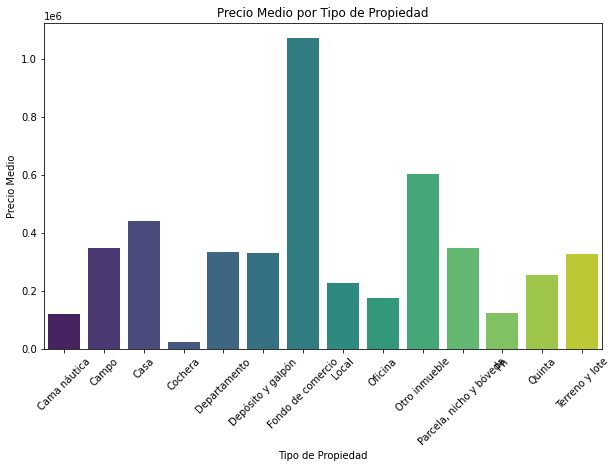

,attribute_property_type,Precio Medio,Precio Mediano,Cantidad
0,Cama náutica,1.181555e+05,45000.0,112
1,Campo,3.487374e+05,150000.0,946
2,Casa,4.407898e+05,215000.0,44033
3,Cochera,2.225437e+04,15500.0,5152
4,Departamento,3.347847e+05,116182.0,81340
5,Depósito y galpón,3.295240e+05,235000.0,1971
6,Fondo de comercio,1.071273e+06,22000.0,949
7,Local,2.248451e+05,140000.0,5237
8,Oficina,1.750303e+05,130000.0,3627
9,Otro inmueble,6.038322e+05,192000.0,1013


In [15]:
def precio_medio_por_tipo(df):
    """
    Calcula el precio medio y mediano por tipo de propiedad.
    
    Parámetros:
    - df: DataFrame que contiene los datos.
    
    Retorna:
    - resumen_precio: DataFrame con el precio medio y mediano por tipo de propiedad.
    """
    resumen_precio = df.groupby('attribute_property_type')['price'].agg(['mean', 'median', 'count']).reset_index()
    resumen_precio.rename(columns={'mean': 'Precio Medio', 'median': 'Precio Mediano', 'count': 'Cantidad'}, inplace=True)
    
    print("Precio medio y mediano por tipo de propiedad:")
    print(resumen_precio)
    
    # Visualización
    plt.figure(figsize=(10, 6))
    sns.barplot(data=resumen_precio, x='attribute_property_type', y='Precio Medio', palette='viridis')
    plt.title('Precio Medio por Tipo de Propiedad')
    plt.xlabel('Tipo de Propiedad')
    plt.ylabel('Precio Medio')
    plt.xticks(rotation=45)
    plt.show()
    
    return resumen_precio

# Uso de la función
precio_medio_por_tipo(df)


Número de propiedades por Estado y Condición del Ítem:
attribute_condición_del_ítem  Nuevo  Usado
location_state_name                       
Bs.As. Costa Atlántica         9337  10489
Bs.As. G.B.A. Norte           20033  16037
Bs.As. G.B.A. Oeste            5934  15071
Bs.As. G.B.A. Sur             10987  14281
Buenos Aires Interior          6222   6009
Capital Federal               23144  36050
Chaco                            56    186


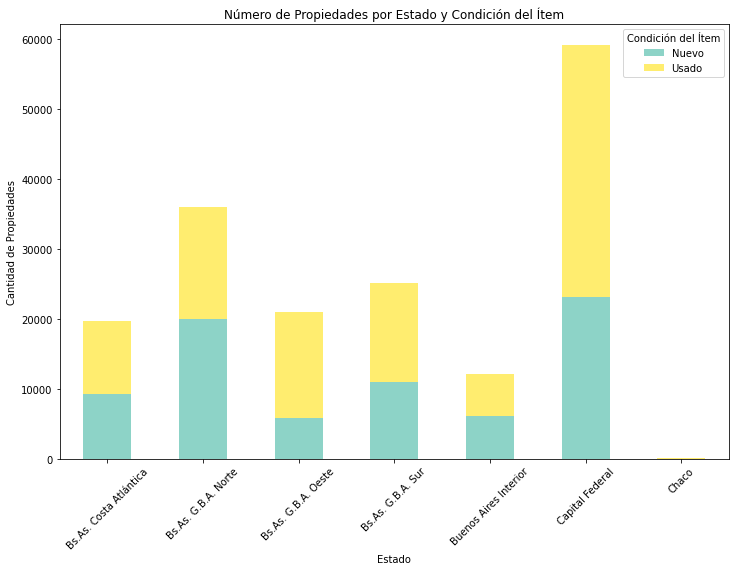

attribute_condición_del_ítem,Nuevo,Usado
location_state_name,,
Bs.As. Costa Atlántica,9337,10489
Bs.As. G.B.A. Norte,20033,16037
Bs.As. G.B.A. Oeste,5934,15071
Bs.As. G.B.A. Sur,10987,14281
Buenos Aires Interior,6222,6009
Capital Federal,23144,36050
Chaco,56,186


In [16]:
def propiedades_por_estado_condicion(df):
    """
    Cuenta el número de propiedades por estado y condición del ítem.
    
    Parámetros:
    - df: DataFrame que contiene los datos.
    
    Retorna:
    - tabla_conteo: DataFrame con el conteo de propiedades.
    """
    tabla_conteo = df.groupby(['location_state_name', 'attribute_condición_del_ítem']).size().unstack(fill_value=0)
    
    print("Número de propiedades por Estado y Condición del Ítem:")
    print(tabla_conteo)
    
    # Visualización
    tabla_conteo.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set3')
    plt.title('Número de Propiedades por Estado y Condición del Ítem')
    plt.xlabel('Estado')
    plt.ylabel('Cantidad de Propiedades')
    plt.xticks(rotation=45)
    plt.legend(title='Condición del Ítem')
    plt.show()
    
    return tabla_conteo

# Uso de la función
propiedades_por_estado_condicion(df)


In [19]:
def superficie_promedio_por_ciudad(df):
    """
    Calcula el promedio de superficie total por ciudad.
    
    Parámetros:
    - df: DataFrame que contiene los datos.
    
    Retorna:
    - superficie_promedio: DataFrame con el promedio de superficie total por ciudad.
    """
    superficie_promedio = df.groupby('location_city_name')['attribute_superficie_total'].mean().reset_index()
    superficie_promedio.rename(columns={'attribute_superficie_total': 'Superficie Total Promedio'}, inplace=True)
    superficie_promedio.sort_values(by='Superficie Total Promedio', ascending=False, inplace=True)
    
    print("Superficie total promedio por ciudad:")
    print(superficie_promedio.head(10))  # Mostrar las 10 ciudades con mayor promedio
    
    # Visualización
    plt.figure(figsize=(12, 6))
    sns.barplot(data=superficie_promedio.head(10), x='location_city_name', y='Superficie Total Promedio', palette='magma')
    plt.title('Top 10 Ciudades por Superficie Total Promedio')
    plt.xlabel('Ciudad')
    plt.ylabel('Superficie Total Promedio')
    plt.xticks(rotation=45)
    plt.show()
    
    return superficie_promedio

# Uso de la función
superficie_promedio_por_ciudad(df)


TypeError: can only concatenate str (not "int") to str

C:\Users\lucki\AppData\Local\Temp\ipykernel_19408\3999966977.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='attribute_property_type', y='attribute_dormitorios', palette='Pastel1')


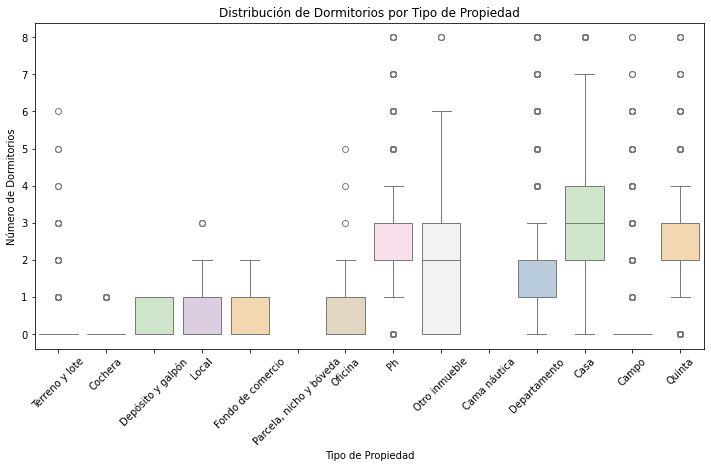

In [18]:
def distribucion_dormitorios(df):
    """
    Muestra la distribución de número de dormitorios por tipo de propiedad.
    
    Parámetros:
    - df: DataFrame que contiene los datos.
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='attribute_property_type', y='attribute_dormitorios', palette='Pastel1')
    plt.title('Distribución de Dormitorios por Tipo de Propiedad')
    plt.xlabel('Tipo de Propiedad')
    plt.ylabel('Número de Dormitorios')
    plt.xticks(rotation=45)
    plt.show()

# Uso de la función
distribucion_dormitorios(df)


Precio medio por número de baños:
   attribute_baños   Precio Medio
0              0.0  357806.843058
1              1.0  306354.461388
2              2.0  406968.715706
3              3.0  364454.187064
4              4.0  359944.423630
5              5.0  629135.759079
6              6.0  341814.402174


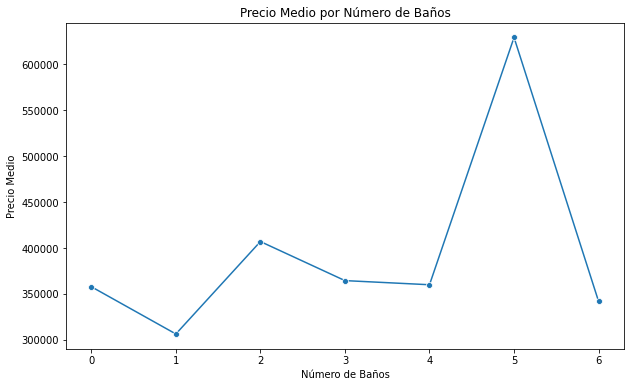

,attribute_baños,Precio Medio
0,0.0,357806.843058
1,1.0,306354.461388
2,2.0,406968.715706
3,3.0,364454.187064
4,4.0,359944.423630
5,5.0,629135.759079
6,6.0,341814.402174


In [20]:
def precio_por_baños(df):
    """
    Calcula el precio medio por número de baños.
    
    Parámetros:
    - df: DataFrame que contiene los datos.
    
    Retorna:
    - precio_baños: DataFrame con el precio medio por número de baños.
    """
    precio_baños = df.groupby('attribute_baños')['price'].mean().reset_index()
    precio_baños.rename(columns={'price': 'Precio Medio'}, inplace=True)
    
    print("Precio medio por número de baños:")
    print(precio_baños)
    
    # Visualización
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=precio_baños, x='attribute_baños', y='Precio Medio', marker='o')
    plt.title('Precio Medio por Número de Baños')
    plt.xlabel('Número de Baños')
    plt.ylabel('Precio Medio')
    plt.show()
    
    return precio_baños

# Uso de la función
precio_por_baños(df)


Pares de variables con mayor correlación:
                            Variable1                              Variable2  \
213                        base_price                                  price   
6                 attribute_ambientes                  attribute_dormitorios   
42                    attribute_baños                  attribute_dormitorios   
2                 attribute_ambientes                        attribute_baños   
305                 seller_address_id                              seller_id   
98   attribute_departamentos_por_piso  attribute_número_de_piso_de_la_unidad   
78                 attribute_cocheras                  attribute_dormitorios   
40                    attribute_baños                     attribute_cocheras   
4                 attribute_ambientes                     attribute_cocheras   
59        attribute_cantidad_de_pisos       attribute_departamentos_por_piso   

     Correlacion  
213     1.000000  
6       0.895434  
42      0.670203  
2

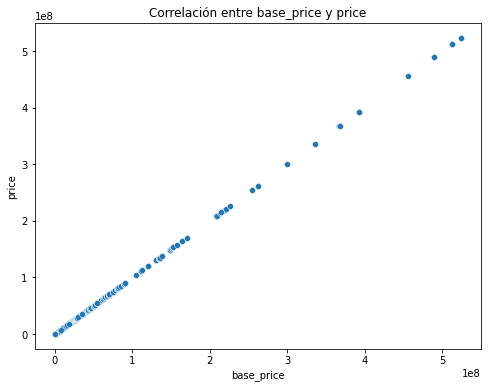

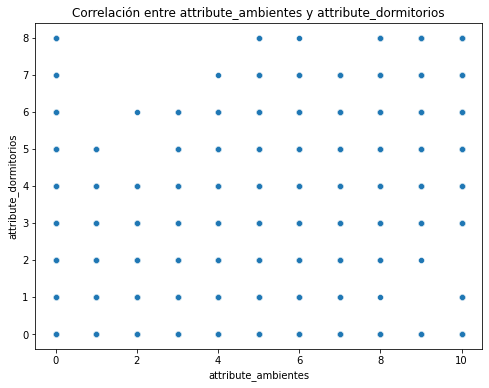

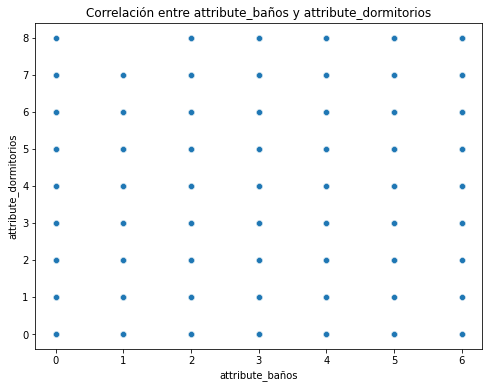

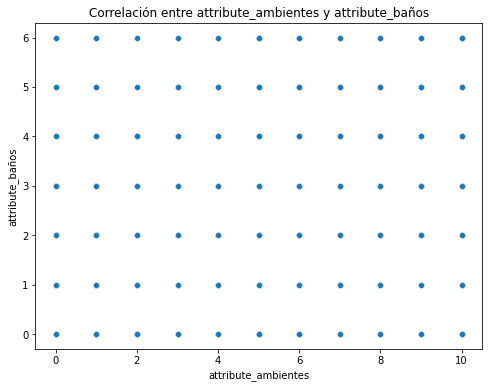

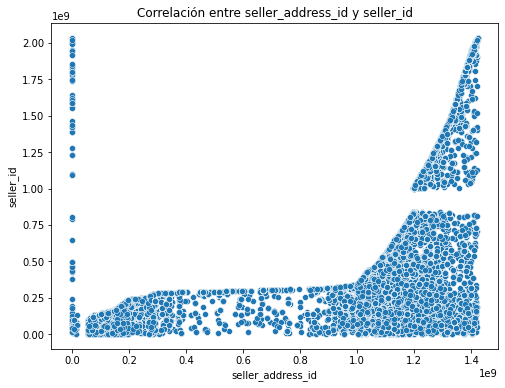

In [21]:
def correlacion_avanzada(df, columnas_numericas):
    """
    Muestra las correlaciones más altas entre las columnas numéricas y visualiza los pares más correlacionados.
    
    Parámetros:
    - df: DataFrame que contiene los datos.
    - columnas_numericas: Lista de nombres de columnas numéricas.
    
    Retorna:
    - correlaciones_altas: DataFrame con las correlaciones más altas.
    """
    corr_matrix = df[columnas_numericas].corr().abs()
    # Extraer pares de variables con alta correlación
    pares_correlacion = corr_matrix.unstack().reset_index()
    pares_correlacion.columns = ['Variable1', 'Variable2', 'Correlacion']
    pares_correlacion = pares_correlacion[pares_correlacion['Variable1'] != pares_correlacion['Variable2']]
    pares_correlacion = pares_correlacion.drop_duplicates(subset=['Correlacion'])
    pares_correlacion = pares_correlacion.sort_values(by='Correlacion', ascending=False)
    
    print("Pares de variables con mayor correlación:")
    print(pares_correlacion.head(10))
    
    # Visualización de los pares más correlacionados
    for index, row in pares_correlacion.head(5).iterrows():
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=row['Variable1'], y=row['Variable2'])
        plt.title(f"Correlación entre {row['Variable1']} y {row['Variable2']}")
        plt.xlabel(row['Variable1'])
        plt.ylabel(row['Variable2'])
        plt.show()
    
    return pares_correlacion

# Uso de la función
correlaciones_altas = correlacion_avanzada(df, columnas_numericas)


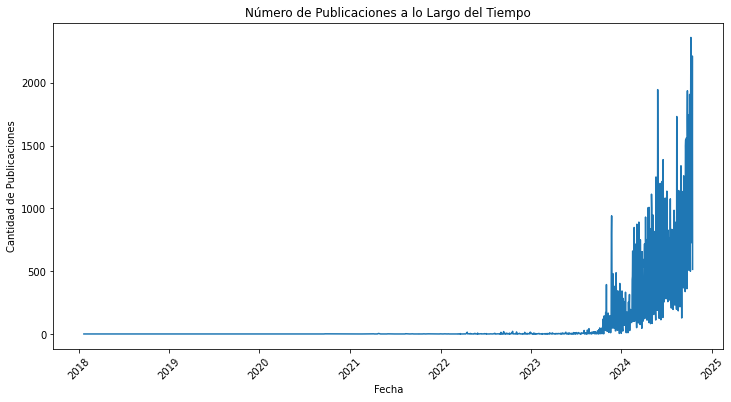

In [22]:
def analisis_temporal(df):
    """
    Analiza el número de publicaciones a lo largo del tiempo.
    
    Parámetros:
    - df: DataFrame que contiene los datos.
    """
    # Asegurar que la columna de fecha esté en formato datetime
    df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce')
    
    # Crear una columna con solo la fecha (sin hora)
    df['fecha'] = df['date_created'].dt.date
    
    # Agrupar por fecha y contar publicaciones
    publicaciones_por_fecha = df.groupby('fecha').size().reset_index(name='Cantidad')
    
    # Visualización
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=publicaciones_por_fecha, x='fecha', y='Cantidad')
    plt.title('Número de Publicaciones a lo Largo del Tiempo')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de Publicaciones')
    plt.xticks(rotation=45)
    plt.show()

# Uso de la función
analisis_temporal(df)


Palabras más frecuentes en las descripciones:
   Palabra  Frecuencia
0       de     2459753
1        y     1425118
2      con     1018830
3       en      977587
4       la      958263
5        a      641030
6       el      592831
7      las      429603
8      del      413288
9      que      347035
10     por      345587
11     los      330152
12    para      311288
13      un      308163
14      al      305064
15      se      248413
16     una      225387
17      no      215678
18     son      168580
19  cocina      165658


C:\Users\lucki\AppData\Local\Temp\ipykernel_19408\2715266114.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=palabras_df, x='Frecuencia', y='Palabra', palette='Blues_d')


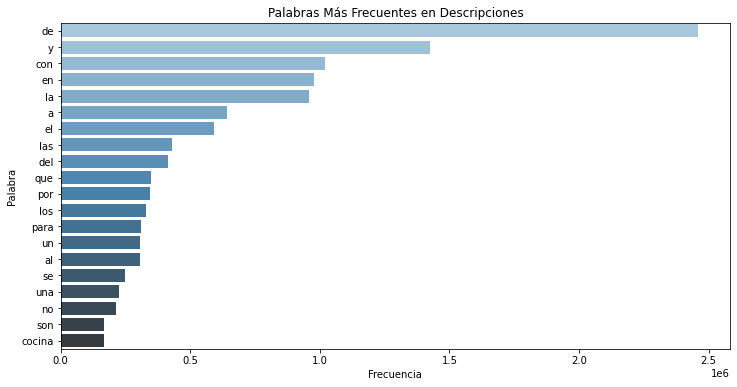

In [23]:
def analisis_palabras_descripcion(df):
    """
    Analiza las palabras más frecuentes en las descripciones.
    
    Parámetros:
    - df: DataFrame que contiene los datos.
    """
    from collections import Counter
    import string
    
    # Combinar todas las descripciones en un solo texto
    texto = ' '.join(df['description'].dropna().astype(str))
    
    # Eliminar signos de puntuación y pasar a minúsculas
    texto = texto.translate(str.maketrans('', '', string.punctuation)).lower()
    
    # Dividir en palabras
    palabras = texto.split()
    
    # Contar las palabras más comunes
    contador = Counter(palabras)
    palabras_comunes = contador.most_common(20)
    
    # Convertir a DataFrame para visualización
    palabras_df = pd.DataFrame(palabras_comunes, columns=['Palabra', 'Frecuencia'])
    
    print("Palabras más frecuentes en las descripciones:")
    print(palabras_df)
    
    # Visualización
    plt.figure(figsize=(12, 6))
    sns.barplot(data=palabras_df, x='Frecuencia', y='Palabra', palette='Blues_d')
    plt.title('Palabras Más Frecuentes en Descripciones')
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.show()

# Uso de la función
analisis_palabras_descripcion(df)


In [26]:
def mapa_propiedades(df):
    """
    Visualiza la distribución geográfica de las propiedades en un mapa.
    
    Parámetros:
    - df: DataFrame que contiene los datos, incluyendo columnas 'latitude' y 'longitude'.
    """
    import folium
    from folium.plugins import HeatMap
    
    # Filtrar filas con coordenadas válidas
    df_geo = df.dropna(subset=['latitude', 'longitude'])
    
    # Crear el mapa centrado en una ubicación promedio
    mapa = folium.Map(location=[df_geo['latitude'].mean(), df_geo['longitude'].mean()], zoom_start=10)
    
    # Agregar puntos al mapa
    for idx, row in df_geo.iterrows():
        folium.CircleMarker(location=[row['latitude'], row['longitude']],
                            radius=2,
                            color='blue',
                            fill=True).add_to(mapa)
    
    # Mostrar el mapa
    display(mapa)

# Uso de la función (asegúrate de tener 'latitude' y 'longitude' en tu DataFrame)
mapa_propiedades(df)


   ---------------------------------------- 108.4/108.4 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 85.1/85.1 kB 5.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


KeyError: ['latitude', 'longitude']

In [28]:
df.columns.to_list()

['Unnamed: 0',
 'accepts_mercadopago',
 'attribute_acceso_a_internet',
 'attribute_admite_mascotas',
 'attribute_agua_corriente',
 'attribute_aire_acondicionado',
 'attribute_ambientes',
 'attribute_antigüedad',
 'attribute_apto_crédito',
 'attribute_apto_profesional',
 'attribute_ascensor',
 'attribute_balcón',
 'attribute_bauleras',
 'attribute_baños',
 'attribute_calefacción',
 'attribute_cantidad_de_pisos',
 'attribute_cocheras',
 'attribute_cocina',
 'attribute_comedor',
 'attribute_con_conexión_para_lavarropas',
 'attribute_con_lavadero',
 'attribute_condición_del_ítem',
 'attribute_código_de_la_propiedad',
 'attribute_departamentos_por_piso',
 'attribute_disposición',
 'attribute_dormitorio_en_suite',
 'attribute_dormitorios',
 'attribute_estrato_social',
 'attribute_expensas',
 'attribute_gas_natural',
 'attribute_gimnasio',
 'attribute_horario_de_contacto',
 'attribute_jardín',
 'attribute_lavandería',
 'attribute_living',
 'attribute_línea_telefónica',
 'attribute_número_de_p

In [31]:
b = pd.read_csv(r'D:\Tesis\bases_datos\real_estate.csv')

C:\Users\lucki\AppData\Local\Temp\ipykernel_19408\2471774441.py:1: DtypeWarning: Columns (3,4,5,6,10,11,12,13,17,21,24,30,31,32,33,36,39,48,49,54,55,57,58,61,62,69,72,75,76,79,80,81,84,85,88,90,92,93,96,98,99,100,103,106,107,108,109,110,114,116,117,121,123,125,126,127,129,131,132,133,134,136,139,140,141,142,143,144,145,146,147,148,152,158,159,160,165,170,173,174,175,180,182,186,187,189,190,191,192,193,195,196,197,201,203,206,208,209,210,211,212,213,215,216,217,220,221,224,225,229,230,231,233,235,236,278,346,348) have mixed types. Specify dtype option on import or set low_memory=False.
  b = pd.read_csv(r'D:\Tesis\bases_datos\real_estate.csv')


In [32]:
b.columns.to_list()

['accepts_mercadopago',
 'attribute_acceso',
 'attribute_acceso_a_internet',
 'attribute_acceso_controlado',
 'attribute_acceso_de_cochera',
 'attribute_acesso_controlado',
 'attribute_acumula_millas_latam_pass',
 'attribute_admite_mascotas',
 'attribute_agua_corriente',
 'attribute_aire_acondicionado',
 'attribute_alarma',
 'attribute_alarma_de_seguridad',
 'attribute_altillo',
 'attribute_altura',
 'attribute_ambientes',
 'attribute_ambientes_del_casco',
 'attribute_amoblado',
 'attribute_ancho',
 'attribute_antigüedad',
 'attribute_antigüedad_del_casco',
 'attribute_apto_crédito',
 'attribute_apto_para_familias_con_niños',
 'attribute_apto_profesional',
 'attribute_ascensor',
 'attribute_ascensores_de_costas',
 'attribute_balcón',
 'attribute_bauleras',
 'attribute_bauleras_disponibles',
 'attribute_baños',
 'attribute_baños_por_piso',
 'attribute_bebederos',
 'attribute_business_center',
 'attribute_báscula',
 'attribute_caballeriza',
 'attribute_caldera',
 'attribute_calefacción',